### Matplotlib

In [1]:
import matplotlib.pyplot as plt

In [15]:
import numpy as np
from numpy.random import randn

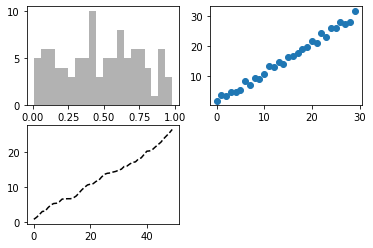

In [11]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1) #2*2 grid 1th plot 
ax2 = fig.add_subplot(2, 2, 2) #2*2 grid 2th plot
ax3 = fig.add_subplot(2, 2, 3) #2*2 grid 3th plot
plt.plot(np.random.rand(50).cumsum(),'k--') #add to the last subplot
ax1.hist(np.random.rand(100),bins=20,color='k',alpha=0.3)
ax2.scatter(np.arange(30),np.arange(30)+3*np.random.rand(30))

In [12]:
#subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
#adjust figure

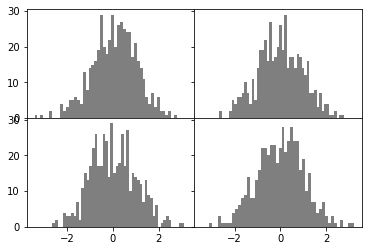

In [13]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

In [14]:
#ax.plot(x, y, linestyle='--',color='g')

In [17]:
data = randn(30).cumsum()

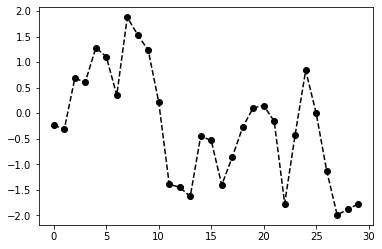

In [18]:
plt.plot(data, 'ko--')

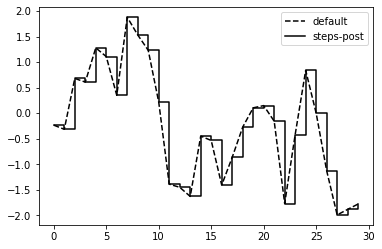

In [23]:
plt.plot(data,'k--',label='default')
plt.plot(data,'k-',drawstyle='steps-post',label='steps-post')
plt.legend(loc='best') #create label

In [29]:
import pandas as pd

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

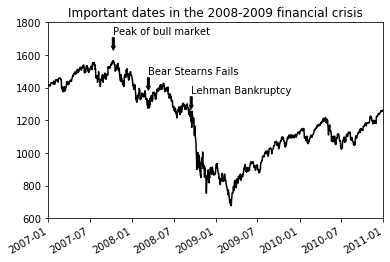

In [30]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('examples/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='black', headwidth=4, width=2,
                                headlength=4),
                horizontalalignment='left', verticalalignment='top')

# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in the 2008-2009 financial crisis')

In [ ]:
#plt.savefig('fig.png',dpi=400,bbox_inches='tight')

In [ ]:
#plt.rc('figure',figsize=(10,10)) #set overall figure size

In [ ]:
#font_options = {'family' : 'monospace',
#               'weight' : 'bold',
#               'size'   : 'small'}
#plt.rc('font', **font_options) #use rc to change system setting

In [33]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
   ....:                   columns=['A', 'B', 'C', 'D'],
   ....:                   index=np.arange(0, 100, 10))

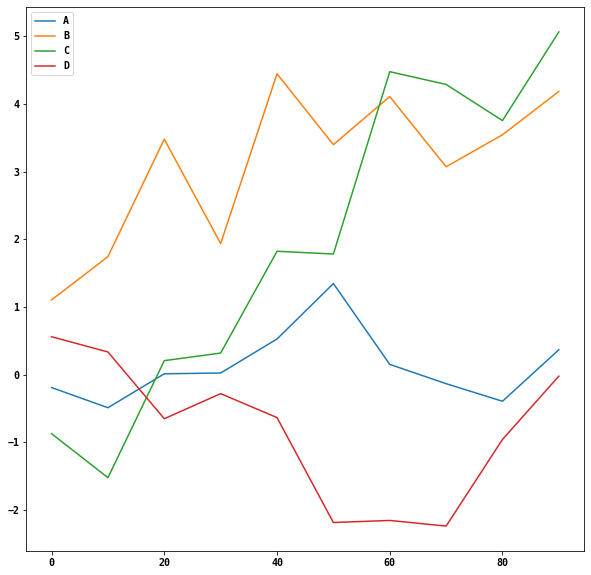

In [34]:
df.plot() #plot for dataframe

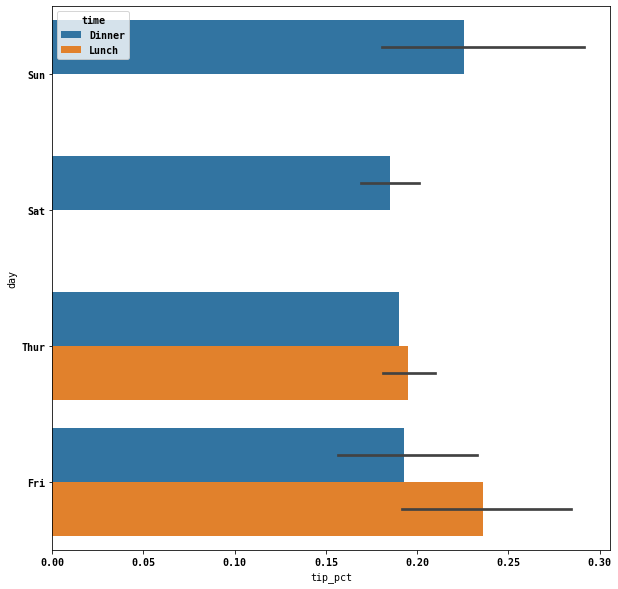

In [39]:
import seaborn as sns
tips = pd.read_csv('examples/tips.csv')
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')
sns.set(style="whitegrid")

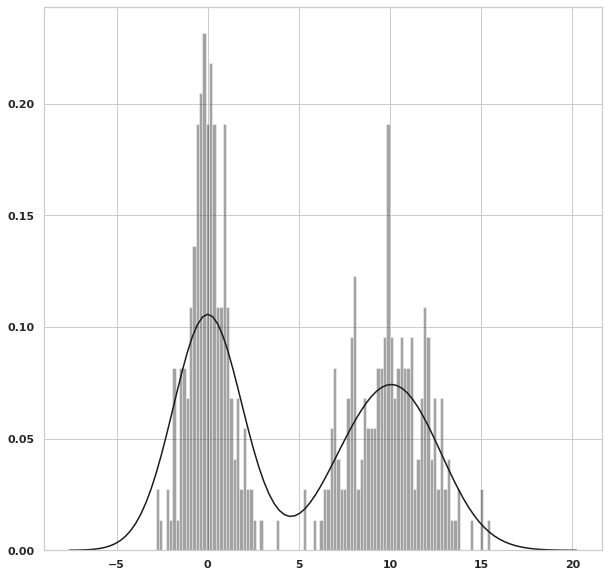

In [40]:
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.distplot(values, bins=100, color='k') #distplot for histogram and KDE density plot

In [41]:
macro = pd.read_csv('examples/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data.head()

,cpi,m1,tbilrate,unemp
1,0.005849,0.014215,0.088193,-0.128617
2,0.006838,-0.008505,0.215321,0.038466
3,0.000681,-0.003565,0.125317,0.055060
4,0.005772,-0.002861,-0.212805,-0.074108
5,0.000338,0.004289,-0.266946,0.000000


Text(0.5, 1.0, 'Changes in log m1 verus log unemp')

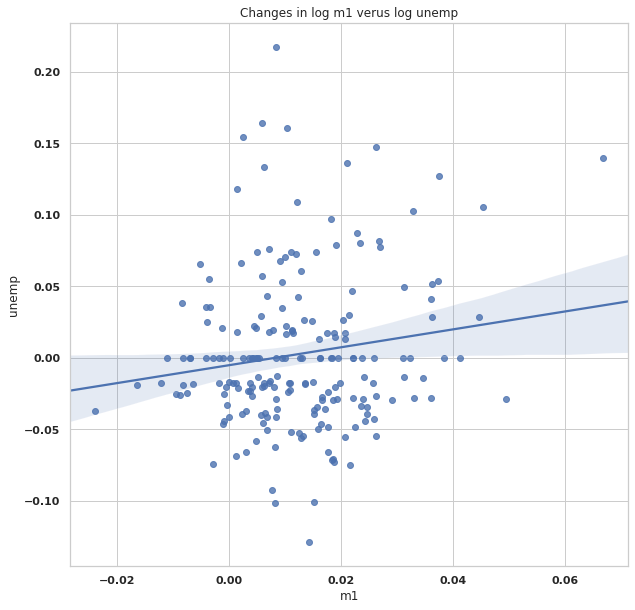

In [44]:
sns.regplot('m1','unemp',data=trans_data) #regplot for scatter plot
plt.title('Changes in log %s verus log %s' %('m1','unemp'))

In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [2]:
df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
   ....:                    'key2' : ['one', 'two', 'one', 'two', 'one'],
   ....:                    'data1' : np.random.randn(5),
   ....:                    'data2' : np.random.randn(5)})
df

,key1,key2,data1,data2
0,a,one,-0.185239,-0.464972
1,a,two,-1.191345,0.556535
2,b,one,0.449789,0.056140
3,b,two,0.712746,-0.821093
4,a,one,0.026829,0.425642


In [3]:
grouped = df['data1'].groupby(df['key1'])
grouped

In [4]:
grouped.mean()

key1
a   -0.449918
b    0.581267
Name: data1, dtype: float64

In [5]:
means = df['data1'].groupby([df['key1'], df['key2']]).mean()
means

key1  key2
a     one    -0.079205
      two    -1.191345
b     one     0.449789
      two     0.712746
Name: data1, dtype: float64

In [6]:
means.unstack()

key2,one,two
key1,,
a,-0.079205,-1.191345
b,0.449789,0.712746


In [7]:
df.groupby(['key1', 'key2']).size()

key1  key2
a     one     2
      two     1
b     one     1
      two     1
dtype: int64

In [10]:
df.groupby(['key1','key2'])[['data2']].mean()

data2
key1 key2          
a    one  -0.019665
     two   0.556535
b    one   0.056140
     two  -0.821093

In [11]:
grouped = df.groupby('key1')

In [12]:
def peak_to_peak(arr):
   ....:     return arr.max() - arr.min()

In [13]:
grouped.agg(peak_to_peak) #self define method

,data1,data2
key1,,
a,1.218174,1.021507
b,0.262957,0.877233


In [14]:
df.groupby('key1',as_index=False).mean()

,key1,data1,data2
0,a,-0.449918,0.172401
1,b,0.581267,-0.382476


,data1,data2
key1,,
a,-0.449918,0.172401
b,0.581267,-0.382476


In [18]:
tips = pd.read_csv('examples/tips.csv')
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,No,Sat,Dinner,2,0.098204


In [17]:
tips.pivot_table(index=['day', 'smoker'])

size       tip   tip_pct  total_bill
day  smoker                                          
Fri  No      2.250000  2.812500  0.151650   18.420000
     Yes     2.066667  2.714000  0.174783   16.813333
Sat  No      2.555556  3.102889  0.158048   19.661778
     Yes     2.476190  2.875476  0.147906   21.276667
Sun  No      2.929825  3.167895  0.160113   20.506667
     Yes     2.578947  3.516842  0.187250   24.120000
Thur No      2.488889  2.673778  0.160298   17.113111
     Yes     2.352941  3.030000  0.163863   19.190588

In [20]:
tips.pivot_table(['tip_pct','size'], index=['time','day'],columns='smoker',margins=True)

size                       tip_pct                    
smoker             No       Yes       All        No       Yes       All
time   day                                                             
Dinner Fri   2.000000  2.222222  2.166667  0.139622  0.165347  0.158916
       Sat   2.555556  2.476190  2.517241  0.158048  0.147906  0.153152
       Sun   2.929825  2.578947  2.842105  0.160113  0.187250  0.166897
       Thur  2.000000       NaN  2.000000  0.159744       NaN  0.159744
Lunch  Fri   3.000000  1.833333  2.000000  0.187735  0.188937  0.188765
       Thur  2.500000  2.352941  2.459016  0.160311  0.163863  0.161301
All          2.668874  2.408602  2.569672  0.159328  0.163196  0.160803

In [21]:
tips.pivot_table('tip_pct', index=['time','smoker'],columns='day',aggfunc=len,margins=True)

day             Fri   Sat   Sun  Thur    All
time   smoker                               
Dinner No       3.0  45.0  57.0   1.0  106.0
       Yes      9.0  42.0  19.0   NaN   70.0
Lunch  No       1.0   NaN   NaN  44.0   45.0
       Yes      6.0   NaN   NaN  17.0   23.0
All            19.0  87.0  76.0  62.0  244.0

### Time series

In [25]:
from datetime import datetime
from datetime import timedelta

In [24]:
datetime.now()

datetime.datetime(2020, 6, 4, 21, 23, 32, 167552)

In [26]:
start = datetime(2011, 1, 7)
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)